In [50]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
import scipy

In [51]:
path_to_ssl = '/mnt/c/PythonScripts/segp/transfer_data/'
relative_path = 'holder/scaled_catplot_box_full_data.csv'
fpath = path_to_ssl + relative_path
print(fpath)
df = pd.read_csv(fpath, index_col = False)
print(df.columns)

/mnt/c/PythonScripts/segp/transfer_data/holder/scaled_catplot_box_full_data.csv
Index(['Models', 'few shot shenzhencxr', 'few shot shenzhencxr uncertainty',
       'few shot montgomerycxr', 'few shot montgomerycxr uncertainty',
       'few shot bach', 'few shot bach uncertainty', 'few shot iChallengeAMD',
       'few shot iChallengeAMD uncertainty', 'few shot iChallengePM',
       ...
       'Unnamed: 252', 'Average by Medical Domain', 'Medical Domain',
       'Unnamed: 255', 'Performance v7', 'Model v7', 'Unnamed: 258',
       'Unnamed: 259', 'Performance v8', 'Model v8'],
      dtype='object', length=262)


In [52]:
# Model names
models = ["simclrv1","mocov2","swav","byol","pirl","supervised r50",
        "supervised r18","supervised d121","mimic-chexpert lr=0.01",
        "mimic-chexpert lr=0.1","mimic-chexpert lr=1.0","mimic-cxr r18",
        "mimic-cxr d121"]

# Base dataset names
medical_datasets = ["shenzhencxr","montgomerycxr","bach","iChallengeAMD",
                "iChallengePM","chexpert","stoic","diabetic retinopathy (5way)",
                "chestx (5way)","cifar10 (2way)"]

# All experiment names
experiment_types = ["few shot", "linear", "finetune", "attentive diffusion", 
        "invariance rotation", "invariance hflip", "invariance hue", 
        "perceptual distance alexnet", "perceptual distance vgg",
        "perceptual distance squeezenet"]

def check_if_experiment_exists(df,experiment_type, medical_dataset):
    """Check if an experiment is done with a specific medical dataset"""
    column_name = experiment_type + " " + medical_dataset
    if column_name in df.columns:
        return True
    else:
        return False

def check_which_models_experiment_exists_for(df,column_name):
    experiment = df.loc[:,[column_name]]
    not_contained_indices = experiment.index[experiment.isnull().all(1)].values
    return list(not_contained_indices)

def extract_cleaned_dataframe(df, column_names):
    # column_names should be a list of existing column_names
    new_df = df.loc[:,tuple(column_names)]
    missing_indices = []
    for column in column_names:
        missing_indices = missing_indices + check_which_models_experiment_exists_for(df,column)
    # remove duplicates
    missing_indices = list(set(missing_indices))
    missing_indices.sort(reverse = True)
    for index in missing_indices:
        new_df.drop(index, inplace = True)
    return new_df

def get_few_shot_uncertainty(full_df,list_of_experiment_types, list_of_medical_datasets, column_names):
    if "few shot" in list_of_experiment_types:
        for dataset in list_of_medical_datasets:
            column_name = "few shot " + dataset + " uncertainty"
            if column_name in full_df.columns:
                column_names.append(column_name)
    return column_names

def clean_dataframe(full_df, list_of_experiment_types, list_of_medical_datasets,imagenet = True,sns_utils = True):
    """The imagenet keyword decides whether imagenet top1 column is included"""
    column_names = []
    for experiment in list_of_experiment_types:
        for medical_dataset in list_of_medical_datasets:
            if check_if_experiment_exists(full_df,experiment, medical_dataset):
                column_name = experiment + " " + medical_dataset
                column_names.append(column_name)
            else:
                raise KeyError('Problem with the lists given, some combinations do not give valid column names')
    if imagenet:
        column_names.append("imagenet top1")
    if sns_utils:
        column_names.append("Models")
        column_names.append("Model Type")
        column_names.append("Marker Size")
    column_names = get_few_shot_uncertainty(full_df,list_of_experiment_types, list_of_medical_datasets, column_names)
    #print(full_df)
    new_df = extract_cleaned_dataframe(full_df, column_names)
    #print(new_df)
    return new_df  

def normalize_list(a_list):
    min_val = min(a_list)
    max_val = max(a_list)
    for i in range(len(a_list)):
        a_list[i] = (a_list[i]-min_val)/(max_val-min_val)
    return a_list, 1/(max_val-min_val)

In [53]:
datasets = ["Model Type","average performance","domain"]
# IN: scaled few shot shenzhencxr	scaled few shot montgomerycxr	scaled few shot chexpert	scaled few shot chestx (5way)	scaled linear chexpert	scaled finetune chexpert
# Out: scaled few shot bach	scaled few shot iChallengeAMD	scaled few shot iChallengePM	scaled few shot diabetic retinopathy (5way)	scaled linear diabetic retinopathy

new_df = df.loc[:,tuple(datasets)]
new_df.dropna(inplace = True)
datasets_v2 = ["Model Type v2","average performance v2","domain v2"]
# IN: scaled few shot shenzhencxr	scaled few shot montgomerycxr	scaled few shot chexpert	scaled few shot chestx (5way)	scaled linear chexpert	scaled finetune chexpert
# Out: scaled few shot bach	scaled few shot iChallengeAMD	scaled few shot iChallengePM	scaled few shot diabetic retinopathy (5way)	scaled linear diabetic retinopathy

new_df_v2 = df.loc[:,tuple(datasets_v2)]
new_df_v2.dropna(inplace = True)
datasets_v3 = ["Model Type v3","average performance v3","domain v3"]
# IN: scaled few shot shenzhencxr	scaled few shot montgomerycxr	scaled few shot chexpert	scaled few shot chestx (5way)	scaled linear chexpert	scaled finetune chexpert
# Out: scaled few shot bach	scaled few shot iChallengeAMD	scaled few shot iChallengePM	scaled few shot diabetic retinopathy (5way)	scaled linear diabetic retinopathy

new_df_v3 = df.loc[:,tuple(datasets_v3)]

print(new_df)


datasets_v4 = ["Model v7","Performance v7"]
# IN: scaled few shot shenzhencxr	scaled few shot montgomerycxr	scaled few shot chexpert	scaled few shot chestx (5way)	scaled linear chexpert	scaled finetune chexpert
# Out: scaled few shot bach	scaled few shot iChallengeAMD	scaled few shot iChallengePM	scaled few shot diabetic retinopathy (5way)	scaled linear diabetic retinopathy

new_df_v4 = df.loc[:,tuple(datasets_v4)]

datasets_v5 = ["Model v8","Performance v8"]
# IN: scaled few shot shenzhencxr	scaled few shot montgomerycxr	scaled few shot chexpert	scaled few shot chestx (5way)	scaled linear chexpert	scaled finetune chexpert
# Out: scaled few shot bach	scaled few shot iChallengeAMD	scaled few shot iChallengePM	scaled few shot diabetic retinopathy (5way)	scaled linear diabetic retinopathy

new_df_v5 = df.loc[:,tuple(datasets_v5)]

print(new_df)



     Model Type  average performance         domain
0           SSL             0.494741      In Domain
1           SSL             0.528201      In Domain
2           SSL             0.523146      In Domain
3           SSL             0.679983      In Domain
4           SSL             0.546108      In Domain
5    Supervised             0.353836      In Domain
6    Supervised             0.413512      In Domain
7    Supervised             0.449036      In Domain
8   Medical SSL             0.727830      In Domain
9   Medical SSL             0.826163      In Domain
10  Medical SSL             0.691890      In Domain
11  Medical SSL             0.250422      In Domain
12  Medical SSL             0.354841      In Domain
13          SSL             0.831140  Out of Domain
14          SSL             0.876244  Out of Domain
15          SSL             0.909330  Out of Domain
16          SSL             0.916952  Out of Domain
17          SSL             0.848290  Out of Domain
18   Supervi

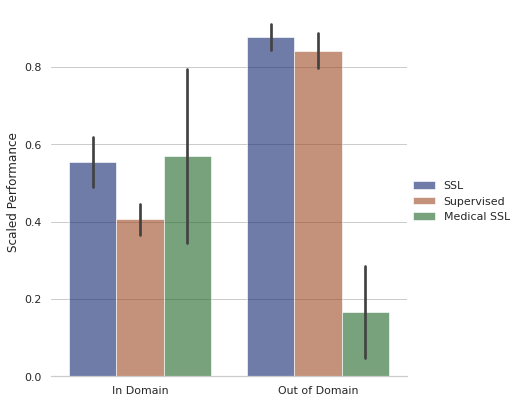

In [54]:
sns.set_theme(style="whitegrid")

# Draw a nested barplot by species and sex
g = sns.catplot(
    data=new_df, kind="bar",
    x="domain", y="average performance", hue="Model Type",
    ci="sd", palette="dark", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("", "Scaled Performance")
g.legend.set_title("")

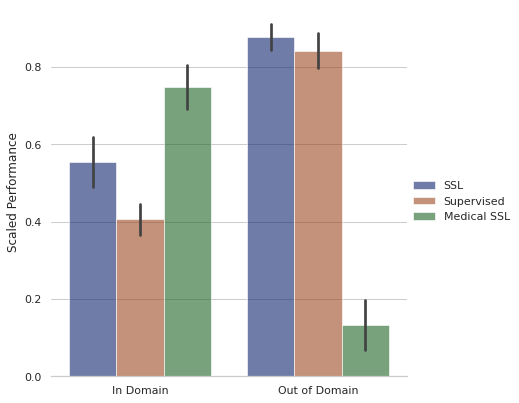

In [55]:
sns.set_theme(style="whitegrid")

# Draw a nested barplot by species and sex
g = sns.catplot(
    data=new_df_v2, kind="bar",
    x="domain v2", y="average performance v2", hue="Model Type v2",
    ci="sd", palette="dark", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("", "Scaled Performance")
g.legend.set_title("")

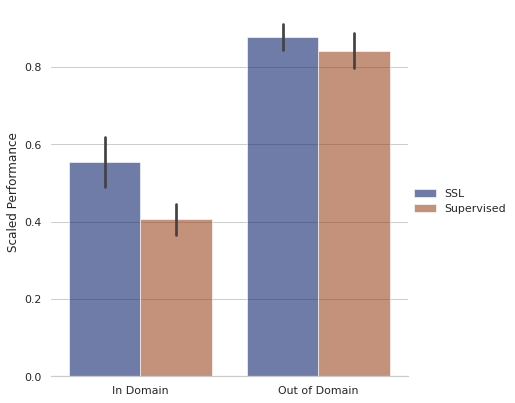

In [56]:
sns.set_theme(style="whitegrid")

# Draw a nested barplot by species and sex
g = sns.catplot(
    data=new_df_v3, kind="bar",
    x="domain v3", y="average performance v3", hue="Model Type v3",
    ci="sd", palette="dark", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("", "Scaled Performance")
g.legend.set_title("")

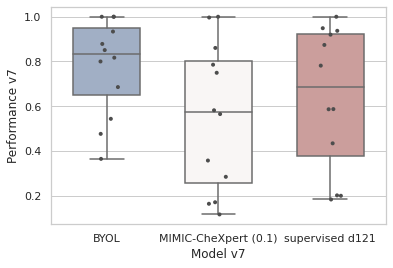

In [57]:
sns.set_theme(style="whitegrid")

# Draw a nested barplot by species and sex
# g = sns.swarmplot(
#     data=new_df_v4,
#     x="Model v7", y="Performance v7", 
#     palette="dark"
# )
sns.boxplot(data=new_df_v4,
            x="Model v7", y="Performance v7", 
            whis=[0, 100], width=.6, palette="vlag")

# Add in points to show each observation
sns.stripplot(data=new_df_v4,
            x="Model v7", y="Performance v7", 
            size=4, color=".3", linewidth=0)
plt.savefig("additional_plots/best_overall_graph.png")
#g.despine(left=True)
#g.set_axis_labels("", "Scaled Performance")
#g.legend.set_title("")

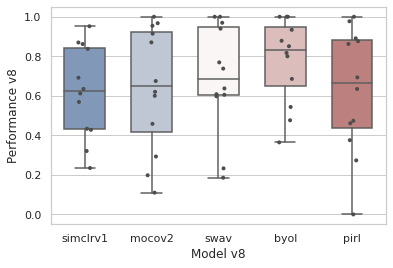

In [58]:
sns.set_theme(style="whitegrid")

# # Draw a nested barplot by species and sex
# g = sns.swarmplot(
#     data=new_df_v5,
#     x="Model v8", y="Performance v8", 
#     palette="dark"
# )

# Plot the orbital period with horizontal boxes
sns.boxplot(data=new_df_v5,
            x="Model v8", y="Performance v8", 
            whis=[0, 100], width=.6, palette="vlag")

# Add in points to show each observation
sns.stripplot(data=new_df_v5,
            x="Model v8", y="Performance v8", 
            size=4, color=".3", linewidth=0)
plt.savefig("additional_plots/best_ssl_graph.png")
#g.despine(left=True)
#g.set_axis_labels("", "Scaled Performance")
#g.legend.set_title("")